In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks'

In [3]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 96% 333M/346M [00:02<00:00, 212MB/s]
100% 346M/346M [00:02<00:00, 161MB/s]


In [6]:
!ls

intel-image-classification.zip	kaggle.json  Untitled0.ipynb


In [7]:
!unzip \*.zip && rm *.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  


In [8]:
!ls

kaggle.json  seg_pred  seg_test  seg_train  Untitled0.ipynb


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg19 import VGG19

In [37]:
train_path = '/content/drive/MyDrive/Colab Notebooks/seg_train/seg_train/'
test_path = '/content/drive/MyDrive/Colab Notebooks/seg_test/seg_test/'

In [38]:
sinif_sayisi = len(glob(train_path + "/*"))
print("Number of class: ", sinif_sayisi)

Number of class:  6


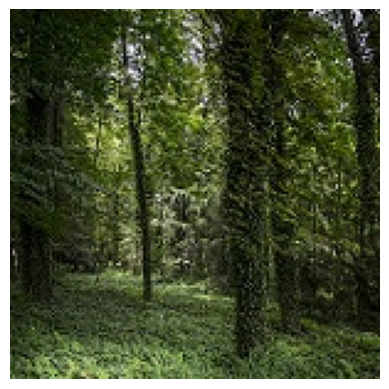

In [39]:
img = load_img(train_path + "/forest/10050.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [40]:
image_shape = img_to_array(img)
image_shape.shape

(150, 150, 3)

In [41]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


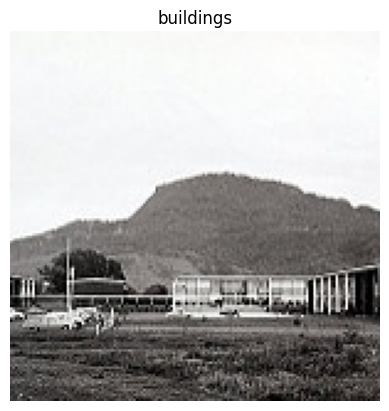

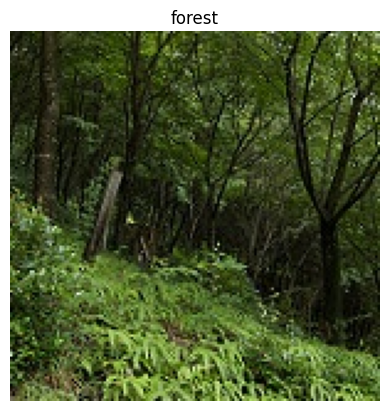

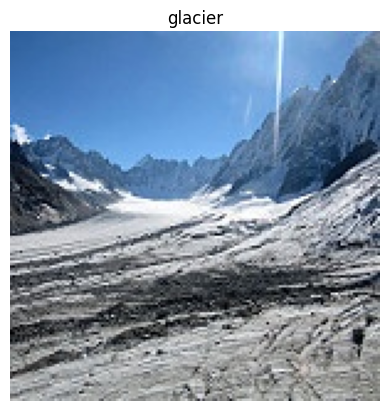

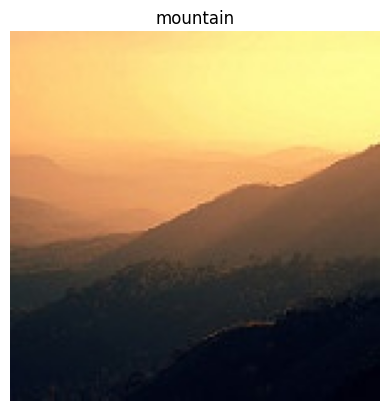

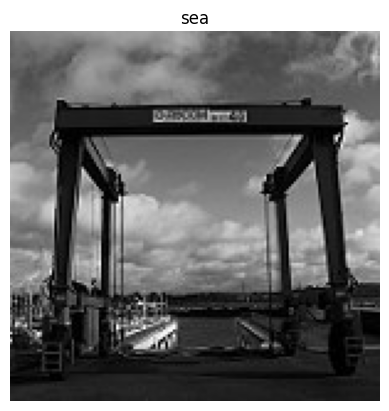

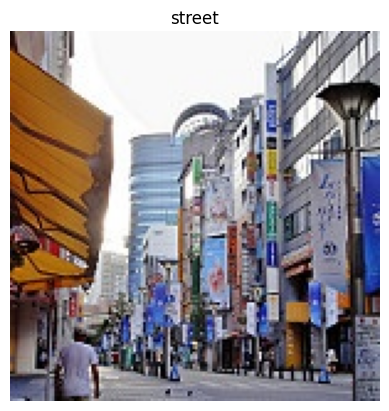

In [42]:
for i in os.listdir(train_path):
    for j in os.listdir(train_path + i):
        img = load_img(train_path + i + "/" + j )
        plt.imshow(img)
        plt.title(i)
        plt.axis("off")
        plt.show()
        break

In [43]:
vgg19 = VGG19()

574710816/574710816 [==============================] - 3s 0us/step


In [44]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
vgg19_layers = vgg19.layers
for i in vgg19.layers:
  print(i)

In [47]:
vgg19_model = Sequential()
for i in range(len(vgg19_layers) - 1):
  vgg19_model.add(vgg19_layers[i])

In [48]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [49]:
for layers in vgg19_layers:
  layers.trainable = False

In [50]:
vgg19_model.add(Dense(sinif_sayisi, activation = "softmax")) # Last layer

In [52]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [53]:
vgg19_model.compile(loss = "categorical_crossentropy", optimizer = "rmsprop", metrics =["accuracy"])

In [56]:
vgg19_egit = vgg19_model.fit_generator(train_data, steps_per_epoch=1600//32, epochs = 10, validation_data=test_data, validation_steps=800//32 )

Epoch 1/10


<ipython-input-56-3ef13af4fd55>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg19_egit = vgg19_model.fit_generator(train_data, steps_per_epoch=1600//32, epochs = 10, validation_data=test_data, validation_steps=800//32 )


50/50 [==============================] - 72s 1s/step - loss: 0.6888 - accuracy: 0.7700 - val_loss: 0.4414 - val_accuracy: 0.8250
Epoch 2/10
50/50 [==============================] - 55s 1s/step - loss: 0.4419 - accuracy: 0.8575 - val_loss: 0.3905 - val_accuracy: 0.8662
Epoch 3/10
50/50 [==============================] - 76s 2s/step - loss: 0.3643 - accuracy: 0.8662 - val_loss: 0.4114 - val_accuracy: 0.8800
Epoch 4/10
50/50 [==============================] - 57s 1s/step - loss: 0.4307 - accuracy: 0.8637 - val_loss: 0.5942 - val_accuracy: 0.7950
Epoch 5/10
50/50 [==============================] - 55s 1s/step - loss: 0.3634 - accuracy: 0.8769 - val_loss: 0.3683 - val_accuracy: 0.8938
Epoch 6/10
50/50 [==============================] - 79s 2s/step - loss: 0.3757 - accuracy: 0.8775 - val_loss: 0.4505 - val_accuracy: 0.8700
Epoch 7/10
50/50 [==============================] - 56s 1s/step - loss: 0.3404 - accuracy: 0.8827 - val_loss: 0.5777 - val_accuracy: 0.8325
Epoch 8/10
50/50 [=============

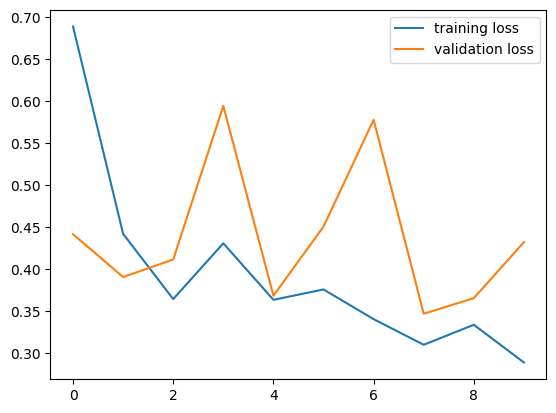

In [57]:
plt.plot(vgg19_egit.history["loss"], label = "training loss")
plt.plot(vgg19_egit.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

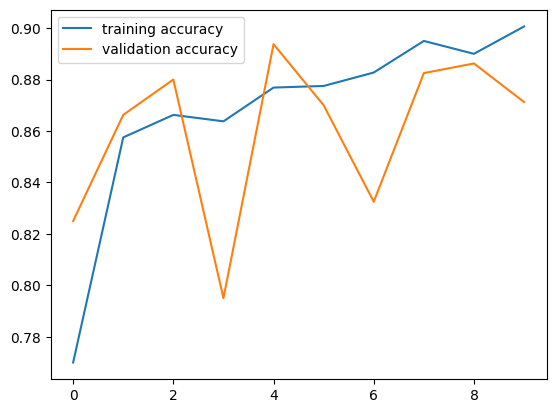

In [58]:
plt.plot(vgg19_egit.history["accuracy"], label = "training accuracy")
plt.plot(vgg19_egit.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()